Imports

In [2]:
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from haversine import haversine

In [3]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("\nFile Name: ", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Dimension', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)
    
    infile.close()
    return nodelist, placelist

In [4]:
def graph(nodes, path):
    X = []
    Y = []
    length = len(path)
    for i in range(length):
        X.append(nodes[path[i]][0])
        Y.append(nodes[path[i]][1])
    X.append(nodes[path[0]][0])
    Y.append(nodes[path[0]][1])
    plt.plot(X,Y)

In [5]:
def print_path(path,place):
    for i in range(len(path)):
        print(place[path[i]],"-->", end =" ")
    print(place[path[0]])

In [6]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [7]:
def global_distance(nodes,n1,n2):
    distance = haversine((nodes[n1][0],nodes[n1][1]), (nodes[n2][0],nodes[n2][1]), unit='mi')
    return distance

In [8]:
def cooling_function(T):
    return T * 0.9999

In [9]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [10]:
def simulated_annealing(nodes, dist, n):
    # Initial Path
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    initial_path = path
    print("Path cost before simulated annealing ", path_cost)
    iteration = 1000000
    temperature = n*1000
    for i in range(iteration):
        rev = sample(range(len(nodes)),2)
        newpath = path.copy()
        newpath[rev[0]:rev[1]+1] = newpath[rev[0]:rev[1]+1][::-1] # reverse sublist
        new_pathcost = get_path_cost(dist, newpath)
        
        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0
        if delE > 0:
            path = newpath.copy()
            path_cost = new_pathcost
        elif random() < prob:
            path = newpath.copy()
            path_cost = new_pathcost
        temperature = cooling_function(temperature)
        if(temperature < 1e-8):
            print("Iterations : ",i)
            break
    return path, path_cost, initial_path


File Name:  Rajasthan
Dimension 20
Path cost before simulated annealing  3265.8970925320577
Iterations :  283227
Execution Time in milliseconds: 3375.341447 ms

Initial Path :
Ranthambore_National_Park --> Neemrana --> Kota --> Shekhawati --> Sariska_Tiger_Reserve --> Bharatpur --> Bikaner --> Chittorgarh --> Jaipur --> Ajmer --> Mount_Abu --> Bundi --> Bhangarh_Fort --> Dechu --> Shakambari_Jheel --> Ranthambore_Fort --> Jaisalmer --> Pali --> Jodhpur --> Udaipur --> Ranthambore_National_Park
Best Path:
Jaipur --> Ranthambore_Fort --> Ranthambore_National_Park --> Kota --> Bundi --> Chittorgarh --> Udaipur --> Mount_Abu --> Pali --> Jodhpur --> Dechu --> Jaisalmer --> Bikaner --> Ajmer --> Shakambari_Jheel --> Shekhawati --> Neemrana --> Bharatpur --> Sariska_Tiger_Reserve --> Bhangarh_Fort --> Jaipur
Best Cost: 1311.4692333826988


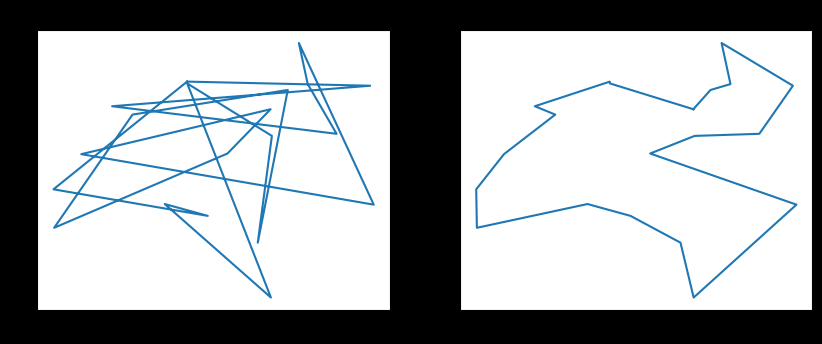


File Name:  xql662
Dimension 662
Path cost before simulated annealing  53097.70280536777
Iterations :  318221
Execution Time in milliseconds: 73077.249291 ms

Initial Path :
58 --> 235 --> 314 --> 5 --> 636 --> 530 --> 527 --> 649 --> 396 --> 387 --> 394 --> 499 --> 64 --> 444 --> 370 --> 586 --> 434 --> 548 --> 84 --> 218 --> 56 --> 573 --> 435 --> 481 --> 63 --> 123 --> 426 --> 116 --> 386 --> 187 --> 537 --> 557 --> 566 --> 195 --> 366 --> 89 --> 222 --> 256 --> 336 --> 651 --> 472 --> 188 --> 55 --> 327 --> 148 --> 520 --> 507 --> 237 --> 135 --> 577 --> 476 --> 112 --> 604 --> 244 --> 198 --> 543 --> 638 --> 451 --> 49 --> 489 --> 603 --> 260 --> 335 --> 102 --> 321 --> 433 --> 294 --> 437 --> 574 --> 245 --> 643 --> 72 --> 563 --> 97 --> 375 --> 175 --> 648 --> 246 --> 312 --> 346 --> 96 --> 588 --> 122 --> 593 --> 292 --> 171 --> 301 --> 491 --> 594 --> 11 --> 37 --> 369 --> 531 --> 447 --> 210 --> 388 --> 144 --> 404 --> 494 --> 654 --> 642 --> 247 --> 475 --> 484 --> 186 --> 

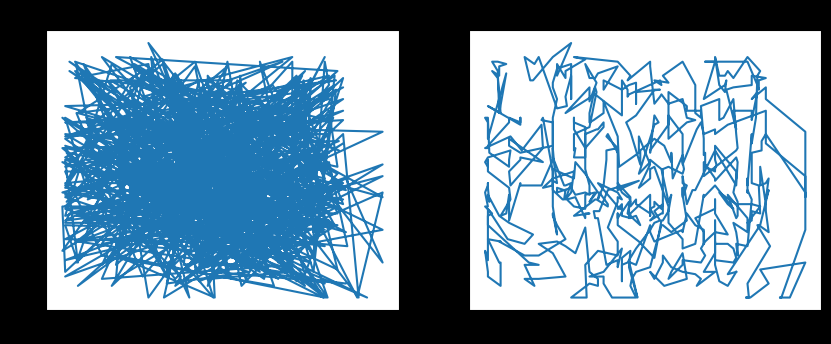

In [11]:
def main():
    misclist = [
        "misc/Rajasthan.tsp", 
#         "misc/xqf131.tsp",
#         "misc/xqg237.tsp", 
#         "misc/pma343.tsp",
#         "misc/pka379.tsp",
#         "misc/bcl380.tsp",
#         "misc/pbl395.tsp",
#         "misc/pbk411.tsp",
        # "misc/pbn423.tsp",
#         "misc/pbm436.tsp",
        "misc/xql662.tsp",
#         "misc/rbx711.tsp",
#         "misc/rbu737.tsp",
#         "misc/dkg813.tsp",
#         "misc/lim963.tsp",
#         "misc/pbd984.tsp",
#         "misc/xit1083.tsp",
#         "misc/dka1376.tsp",
#         "misc/dca1389.tsp",
#         "misc/dja1436.tsp",
#         "misc/icw1483.tsp"
    ]

    iterator = 1
    for d in misclist:
        nodes, place = tsp_read(d)
        coords = np.array(nodes) 
        n = len(coords)
        # Distance Array
        dist = np.zeros((n, n), dtype=float)

        for i in range(n):
            for j in range(i+1, n):
                if d == "misc/Rajasthan.tsp":
                    dist[i, j] = global_distance(nodes, i, j)
                else:
                    dist[i, j] = euclidean_distance(nodes, i, j)
                dist[j, i] = dist[i, j]

        start = time.time_ns()
        best_path, best_cost, initial_path = simulated_annealing(nodes, dist, n)
        end = time.time_ns()
        print('Execution Time in milliseconds:', (end-start)/1e6,"ms")
        print('\nInitial Path :' )
        print_path(initial_path,place)
        print('Best Path:')
        print_path(best_path,place)
        print('Best Cost:', best_cost)
        plt.figure(figsize = (10,8))
        plt.subplot(len(misclist), 2, iterator)
        graph(nodes, initial_path)
        plt.title("Before")
        iterator += 1
        plt.subplot(len(misclist), 2, iterator)
        graph(nodes, best_path)
        plt.title("After")
        iterator += 1
        plt.show()


if __name__ == "__main__":
    main()